In [198]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [199]:
from sklearn.datasets import fetch_openml 

In [200]:
from sklearn.datasets import fetch_openml 

X, y = fetch_openml(name='credit-g', as_frame=True, return_X_y=True)
X.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
dtype: object

In [202]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.000,critical/other existing credit,radio/tv,1169.000,no known savings,>=7,4.000,male single,none,4.000,real estate,67.000,none,own,2.000,skilled,1.000,yes,yes
1,0<=X<200,48.000,existing paid,radio/tv,5951.000,<100,1<=X<4,2.000,female div/dep/mar,none,2.000,real estate,22.000,none,own,1.000,skilled,1.000,none,yes
2,no checking,12.000,critical/other existing credit,education,2096.000,<100,4<=X<7,2.000,male single,none,3.000,real estate,49.000,none,own,1.000,unskilled resident,2.000,none,yes
3,<0,42.000,existing paid,furniture/equipment,7882.000,<100,4<=X<7,2.000,male single,guarantor,4.000,life insurance,45.000,none,for free,1.000,skilled,2.000,none,yes
4,<0,24.000,delayed previously,new car,4870.000,<100,1<=X<4,3.000,male single,none,4.000,no known property,53.000,none,for free,2.000,skilled,2.000,none,yes


In [203]:
X.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
dtype: object

In [204]:
X.isnull().sum() * 100 / len(df)

checking_status          0.000
duration                 0.000
credit_history           0.000
purpose                  0.000
credit_amount            0.000
savings_status           0.000
employment               0.000
installment_commitment   0.000
personal_status          0.000
other_parties            0.000
residence_since          0.000
property_magnitude       0.000
age                      0.000
other_payment_plans      0.000
housing                  0.000
existing_credits         0.000
job                      0.000
num_dependents           0.000
own_telephone            0.000
foreign_worker           0.000
dtype: float64

In [205]:
train = X
train['target'] = y

In [206]:
train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6.000,critical/other existing credit,radio/tv,1169.000,no known savings,>=7,4.000,male single,none,4.000,real estate,67.000,none,own,2.000,skilled,1.000,yes,yes,good
1,0<=X<200,48.000,existing paid,radio/tv,5951.000,<100,1<=X<4,2.000,female div/dep/mar,none,2.000,real estate,22.000,none,own,1.000,skilled,1.000,none,yes,bad
2,no checking,12.000,critical/other existing credit,education,2096.000,<100,4<=X<7,2.000,male single,none,3.000,real estate,49.000,none,own,1.000,unskilled resident,2.000,none,yes,good
3,<0,42.000,existing paid,furniture/equipment,7882.000,<100,4<=X<7,2.000,male single,guarantor,4.000,life insurance,45.000,none,for free,1.000,skilled,2.000,none,yes,good
4,<0,24.000,delayed previously,new car,4870.000,<100,1<=X<4,3.000,male single,none,4.000,no known property,53.000,none,for free,2.000,skilled,2.000,none,yes,bad


In [207]:
X = train.drop('target', axis=1)
y = train['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [208]:
train.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
target                    category
dtype: object

In [209]:
numeric_features = [1,4,7,10,12,15,17]
categorical_features = [0,2,3,6,8,9,11,13,14,16,18,19]

In [210]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [211]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [212]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 4, 7, 10, 12, 15, 17]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='most_frequent',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                              

In [214]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.61      0.39      0.47        59
        good       0.78      0.89      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.73       200



In [223]:
sample = X_test[:1].to_numpy()

In [226]:
sample_true = y_test[:1].to_numpy()
sample_true

array(['good'], dtype=object)

In [224]:
sample

array([['<0', 6.0, 'existing paid', 'used car', 1352.0, '500<=X<1000',
        'unemployed', 1.0, 'female div/dep/mar', 'none', 2.0,
        'life insurance', 23.0, 'none', 'rent', 1.0,
        'unemp/unskilled non res', 1.0, 'yes', 'yes']], dtype=object)

In [222]:
import json

j_data = json.dumps(np.array2string(sample))
j_data

'"[[\'<0\' 6.0 \'existing paid\' \'used car\' 1352.0 \'500<=X<1000\' \'unemployed\'\\n  1.0 \'female div/dep/mar\' \'none\' 2.0 \'life insurance\' 23.0 \'none\' \'rent\'\\n  1.0 \'unemp/unskilled non res\' 1.0 \'yes\' \'yes\']]"'

In [216]:
print(rf.predict(sample))

['good']


In [217]:
import pickle
pickle.dump(rf, open('final_prediction.pickle', 'wb'))

<AxesSubplot:ylabel='Frequency'>

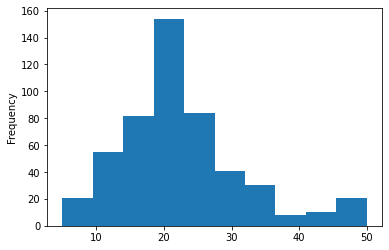

In [108]:
train['TARGET'].plot.hist()

In [11]:
grouped = X.groupby('personal_status')

grouped['age'].quantile(0.25)

personal_status
male div/sep          31.0
female div/dep/mar    24.0
male single           30.0
male mar/wid          25.0
female single          NaN
Name: age, dtype: float64

In [12]:
grouped['age'].describe()

,count,mean,std,min,25%,50%,75%,max
personal_status,,,,,,,,
male div/sep,50.0,38.640000,10.223542,24.0,31.0,36.0,45.75,62.0
female div/dep/mar,310.0,32.803226,11.754363,19.0,24.0,29.0,37.00,75.0
male single,548.0,37.687956,11.089271,20.0,30.0,36.0,44.00,75.0
male mar/wid,92.0,30.347826,8.373735,20.0,25.0,28.0,33.25,61.0
female single,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
